# The Sparks Foundation - #GRIPNOVEMBER21

# Data Science and Business Analytics Internship

# TASK 1- Prediction using Supervised ML

# BY NITHYA SHARMA

# Problem Statement
Predict the percentage of a student based on the no. of study hours.

What will be predicted score if a student studies for 9.25 hrs / day?

In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
Data=pd.read_csv("http://bit.ly/w-data")

In [3]:
Data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# EXPLORATORY DATA ANALYSIS

In [5]:
Data.shape

(25, 2)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#Checking for any missing values
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# DATA VISUALIZATION

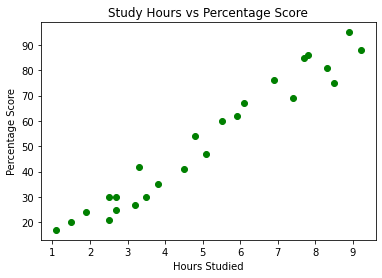

In [9]:
# Plotting the distribution of scores
plt.scatter(x='Hours', y='Scores',data=Data, c='green')
plt.title("Study Hours vs Percentage Score")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

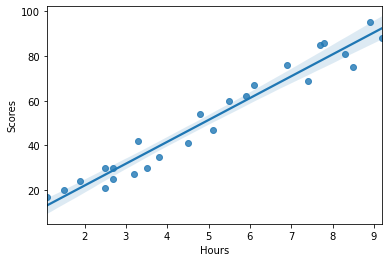

In [14]:
# Plotting the regression plot as it will give us a better and clear visualization of data by drawing a linear line
sns.regplot(x=Data['Hours'], y=Data['Scores']); 

From both the graphs we can see +ve lr between the no. of hrs studied and % of score

# DATA PREPARATION

In [16]:
X = Data.iloc[:, :-1].values  
y = Data.iloc[:, 1].values  

In [17]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [18]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [19]:
#SPLITTING THE DATA
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [38]:
#TRAINING THE DATA
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 
print("Completed Training.")

Completed Training.


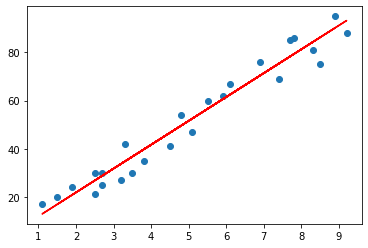

In [43]:
# Plotting the linear regression line
line = r.coef_*X+r.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,c='r');
plt.show()

# PREDICTIONS

In [48]:
# Prediction
pred_y = lr.predict(X_test) 

# View actual and predicted on test set side by side
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [49]:
print(X_test) # Testing data - In Hours
y_pred = r.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [50]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [51]:
# Comparing Actual vs Predicted
Data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
Data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


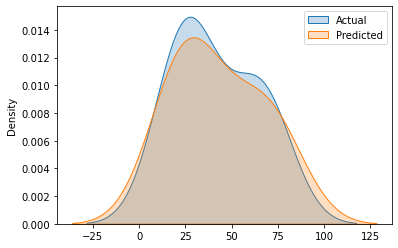

In [52]:
## Actual vs Predicted distribution plot (by means of Kernel Density Estimate)
sns.kdeplot(data=y_test, label="Actual", shade=True);
sns.kdeplot(data=y_pred, label="Predicted", shade=True);  
plt.legend()

There's a little bit of difference / error between Actual & Predicted values because it slowly decreases as we feed data to the model, by making minor changes in training & test and other factors that control the model

# TRAIN AND TEST SCORE ESTIMATION

In [53]:
#regression score
print("Training Score:",r.score(X_train,y_train))
print("Test Score:",r.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


Train & Test accuracy are pretty close to each other so we can say that the model is working fine

# What will the predicted score if the student studies for 9.25 hours/day ?

In [54]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = r.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# MODEL EVALUATION

In [55]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174


# THANK  YOU